In [69]:
import pandas as pd
import numpy as np
import os
from collections import OrderedDict
import datetime as dt

In [79]:
# my libraries
from importlib import reload
import pricer
reload(pricer)

<module 'pricer' from '/Users/adammoszczynski/Desktop/research/american option pricing/pricer.py'>

In [71]:
daily_chains = OrderedDict()
files = sorted(os.listdir('spy_data'))

for file in files:
    if file[-4:] == '.csv':
        df = pd.read_csv('spy_data/' + file)        
        
        # moving to datetime and making features
        df['quote_datetime'] = pd.to_datetime(df['quote_datetime'])
        df['expiration'] = pd.to_datetime(df['expiration'])
        df['quote_date'] = df['quote_datetime'][0].date()
        df['quote_date'] = pd.to_datetime(df['quote_date'])
        
        # getting only 4:00 quotes
        eod = dt.datetime.combine(df['quote_datetime'][0].date(), dt.time(16,0, 0))
        df = df.loc[df['quote_datetime'] == eod]
        
        # getting time to expiration and moneyness
        df['T'] = df['expiration'] - df['quote_date']
        df['T'] = df['T'].dt.days
        
        df['mid'] = (df['bid'] + df['ask']) / 2
        
        # filtering for research paper criteria
        df = df.loc[(df['close']!=0) & (df['T'] >= 20) & (df['T'] <= 365)]
                    
        calls = df.loc[df['option_type']=='C'][['quote_date', 'expiration', 'T','implied_volatility', 'active_underlying_price', 'strike', 'bid', 'ask', 'mid']]
        puts = df.loc[df['option_type']=='P'][['quote_date','expiration', 'T', 'implied_volatility', 'active_underlying_price', 'strike', 'bid', 'ask', 'mid']]
        
        daily_chains[file[-14:-4]] = {'calls':calls, 'puts':puts}

In [72]:
c = daily_chains['2023-10-02']['calls']

In [73]:
c['delta'] = c.apply(lambda row: pricer.calculate_delta(row, 'call', .0001), axis=1)

In [74]:
c['gamma'] = c.apply(lambda row: pricer.calculate_gamma(row, 'call', .1, .0001), axis=1)

In [80]:
c['vega'] = c.apply(lambda row: pricer.calculate_vega(row, 'call', .1), axis=1)

In [83]:
c.loc[c['T']==25].iloc[10:20]

,quote_date,expiration,T,implied_volatility,active_underlying_price,strike,bid,ask,mid,delta,gamma,vega
6548,2023-10-02,2023-10-27,25,0.1776,427.365,417.0,15.25,15.33,15.290,0.729347,0.011023,0.390406
6552,2023-10-02,2023-10-27,25,0.1759,427.365,418.0,14.48,14.54,14.510,0.729534,0.011162,0.398055
6556,2023-10-02,2023-10-27,25,0.1744,427.365,419.0,13.72,13.80,13.760,0.708374,0.011224,0.404765
6560,2023-10-02,2023-10-27,25,0.1727,427.365,420.0,12.98,13.04,13.010,0.686502,0.011270,0.411622
6564,2023-10-02,2023-10-27,25,0.1710,427.365,421.0,12.25,12.32,12.285,0.663960,0.011319,0.417728
6568,2023-10-02,2023-10-27,25,0.1695,427.365,422.0,11.54,11.60,11.570,0.664162,0.011355,0.423921
6572,2023-10-02,2023-10-27,25,0.1679,427.365,423.0,10.85,10.90,10.875,0.641017,0.011390,0.428742
6576,2023-10-02,2023-10-27,25,0.1661,427.365,424.0,10.18,10.22,10.200,0.617379,0.011424,0.433352
6580,2023-10-02,2023-10-27,25,0.1645,427.365,425.0,9.52,9.55,9.535,0.593272,0.011467,0.437237
6584,2023-10-02,2023-10-27,25,0.1628,427.365,426.0,8.88,8.91,8.895,0.568829,0.011490,0.440568


In [84]:
c25 = c.loc[c['T']==25]

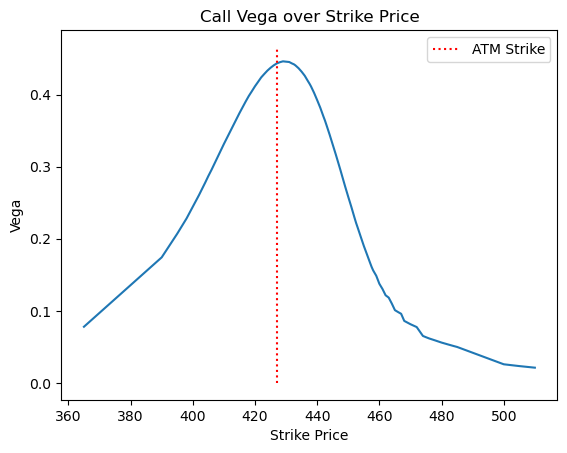

In [104]:
import matplotlib.pyplot as plt

plt.plot(c25['strike'], c25['vega'])
plt.vlines(427, ymin=0, ymax=max(c25['vega'])+0.02, label='ATM Strike', linestyle='dotted', color='r')

plt.xlabel('Strike Price')
plt.ylabel('Vega')
plt.title("Call Vega over Strike Price")
plt.legend()
plt.show()

In [105]:
p = daily_chains['2023-10-02']['puts']

In [106]:
p['delta'] = p.apply(lambda row: pricer.calculate_delta(row, 'put', .0001), axis=1)

In [107]:
p['gamma'] = p.apply(lambda row: pricer.calculate_gamma(row, 'put', .1, .0001), axis=1)

In [108]:
p['vega'] = p.apply(lambda row: pricer.calculate_vega(row, 'put', .1), axis=1)

In [110]:
p25 = p.loc[p['T']==25]

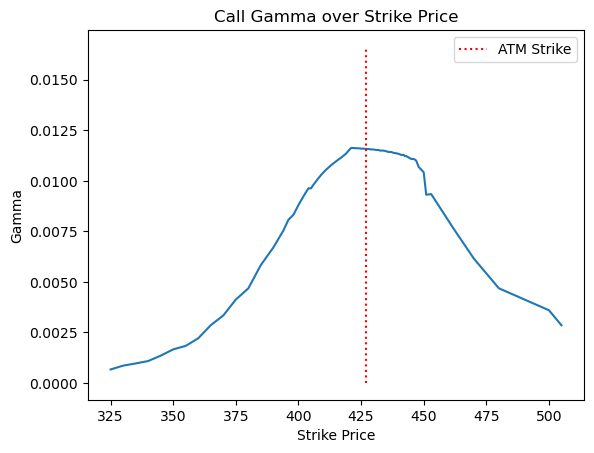

In [114]:
import matplotlib.pyplot as plt

plt.plot(p25['strike'], p25['vega'])
plt.vlines(427, ymin=0, ymax=max(p25['vega'])+0.02, label='ATM Strike', linestyle='dotted', color='r')

plt.xlabel('Strike Price')
plt.ylabel('vega')
plt.title("Call Vega over Strike Price")
plt.legend()
plt.show()